# Lista 4

In [1248]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [1249]:
import matplotlib.colors as colors
from itertools import cycle
from sklearn import metrics

def plotClustering(X, plt_labels):
    plt_colors = cycle(('blue', 'green', 'yellow', 'cyan', 'orange', 'purple', 'black'))

    plt_K = np.unique(plt_labels).size

    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)

        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, plt_labels))
    plt.show()
    

## Dunn index

In [1250]:
def min_d_centers(centers):
    sq1_sums = np.array([np.sum(centers ** 2, axis=1)])
    sq2_sums = np.array([np.sum(centers ** 2, axis=1)])
    mult = np.array(-2 * centers.dot(np.transpose(centers)))
    distances = np.array(np.transpose(sq1_sums) + sq2_sums + mult)
    
    return np.min(np.ma.masked_equal(distances, 0.0, copy=False))

def indexes(clustNum, labels): 
    return np.where(labels == clustNum)[0]

def max_d_vectors(centers, labels):
    maks = 0
    n_cluster = centers.shape[0]
    
    for cluster_index in range(n_cluster):
        vectors = X[indexes(cluster_index, labels)]
        sq1_sums = np.array([np.sum(vectors ** 2, axis=1)])
        sq2_sums = np.array([np.sum(vectors ** 2, axis=1)])
        mult = np.array(-2 * vectors.dot(np.transpose(vectors)))
        distances = np.array(np.transpose(sq1_sums) + sq2_sums + mult)
        
        if distances.size != 0:
            maks_d_cluster = np.max(distances)
        
            if maks_d_cluster > maks:
                maks = maks_d_cluster
    
    return maks
        

def dunn(centers, labels):
    # print(min_d_centers(centers))
    # print( max_d_vectors(centers, labels))
    print("Dunn index: " + str(math.fabs(min_d_centers(centers) / max_d_vectors(centers, labels))) )

## Davies-Bouldin index

In [1251]:
from math import sqrt

def distance(center, vectors):
    return (center-vectors)**2

def S_i(centers, labels):
    n_cluster = centers.shape[0]
    
    S = []
    for cluster_index in range(n_cluster):
        vectors = X[indexes(cluster_index, labels)]
        
        S.append(sqrt(np.sum(distance(centers[cluster_index], vectors))))
    
    return S

def M_i(centers, labels):
    n_clusters = centers.shape[0]
    
    M = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            if i != j:
                vectors_i = X[indexes(i, labels)]
                vectors_j = X[indexes(j, labels)]
                sq1_sums = np.array([np.sum(vectors_i ** 2, axis=1)])
                sq2_sums = np.array([np.sum(vectors_j ** 2, axis=1)])
                mult = np.array(-2 * vectors_i.dot(np.transpose(vectors_j)))
                distances = np.array(np.transpose(sq1_sums) + sq2_sums + mult)
                
                M[i][j] = sqrt(np.sum(distances))
                
    return M

def db(centers, labels):
    n_clusters = centers.shape[0]
    
    S = S_i(centers, labels)
    M = M_i(centers, labels)
    R = np.zeros((n_clusters, n_clusters))
    
    
    for i in range(n_clusters):
        for j in range(n_clusters):
            if i != j and M[i][j] != 0:
                R[i][j] = (S[i] + S[j]) / M[i][j] 
    
    db = np.sum(np.max(R, axis=1)) / n_clusters
    
    print("Davies-Bouldin index: " + str(db))

Silhouette Coefficient: 0.673


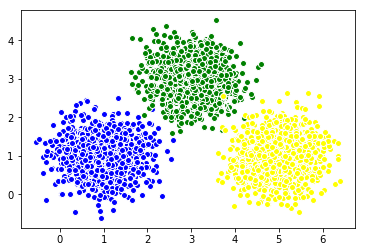

In [1252]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)

## KMeans

#### n_init = 1

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0149306813474
Silhouette Coefficient: 0.674


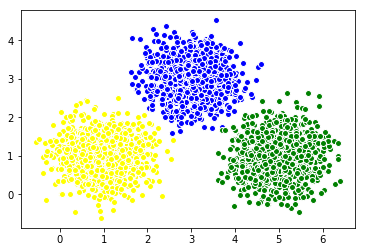

In [1253]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

dunn(k_means.cluster_centers_, k_means.labels_)
db(k_means.cluster_centers_, k_means.labels_)
plotClustering(X, k_means.labels_)

#### n_init = 2

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0149306813474
Silhouette Coefficient: 0.674


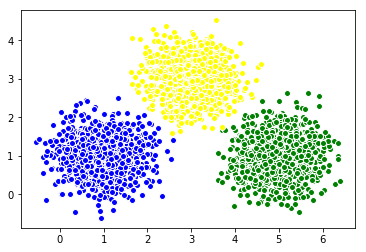

In [1254]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=2)
k_means.fit(X)

dunn(k_means.cluster_centers_, k_means.labels_)
db(k_means.cluster_centers_, k_means.labels_)
plotClustering(X, k_means.labels_)

#### n_init = 10

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0149306813474
Silhouette Coefficient: 0.674


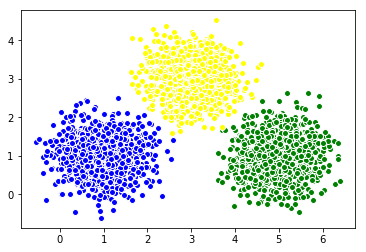

In [1255]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

dunn(k_means.cluster_centers_, k_means.labels_)
db(k_means.cluster_centers_, k_means.labels_)
plotClustering(X, k_means.labels_)

## BIRCH

### Bez wtórnego grupowania

#### threshold = 1.0

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0149307088102
Silhouette Coefficient: 0.674


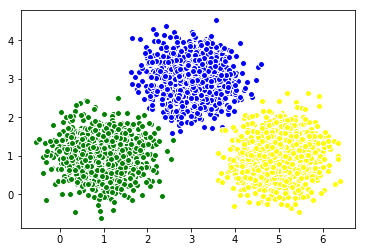

In [1256]:
birch = Birch(threshold=1.0, n_clusters=None)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

#### threshold = 0.75

Dunn index: 7.263111888687036e-16
Davies-Bouldin index: 0.0397009605219
Silhouette Coefficient: 0.412


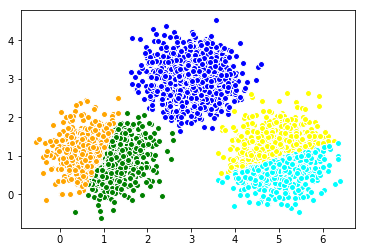

In [1257]:
birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

#### threshold = 0.5

Dunn index: 3.1953404061382293e-16
Davies-Bouldin index: 0.0756036847349
Silhouette Coefficient: 0.298


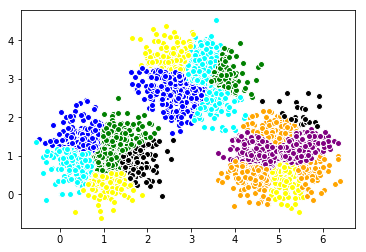

In [1258]:
birch = Birch(threshold=0.5, n_clusters=None)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

### z wtórnym grupowaniem

#### threshold = 1.0

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0535730609287
Silhouette Coefficient: 0.674


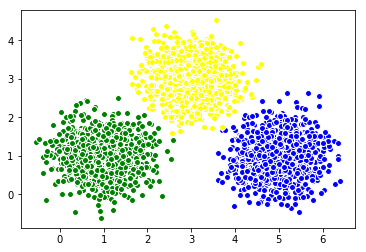

In [1259]:
birch = Birch(threshold=1.0, n_clusters=3)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

#### threshold = 0.75

Dunn index: 5.987192610076506e-16
Davies-Bouldin index: 0.0386076767565
Silhouette Coefficient: 0.674


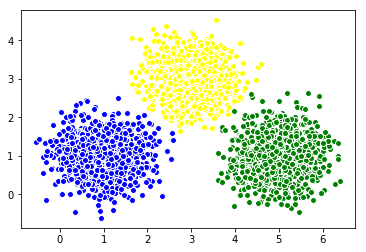

In [1260]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

## DBSCAN

### Modyfikacja rysowania (grupy + szum)

In [1261]:
import matplotlib.colors as colors
from itertools import cycle

def newPlotClustering(X, plt_labels):
    plt_colors = cycle(('blue', 'green', 'yellow', 'cyan', 'orange', 'purple', 'black'))

    plt_K = np.unique(plt_labels).size - 1  
    color = next(plt_colors)
    mask = (plt_labels == -1)
    
    plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='s')
    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, plt_labels))
    plt.show()

#### eps = 0.25

Silhouette Coefficient: 0.607


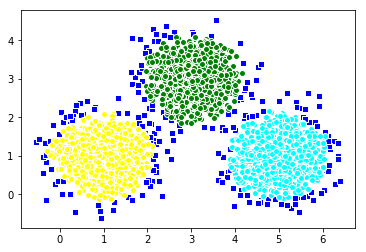

In [1262]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

#### eps = 0.5

Silhouette Coefficient: 0.251


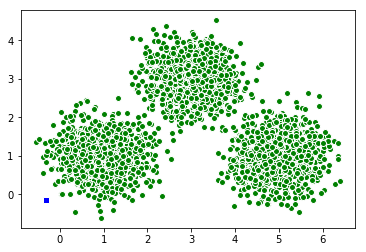

In [1263]:
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

#### eps = 0.3

Silhouette Coefficient: 0.644


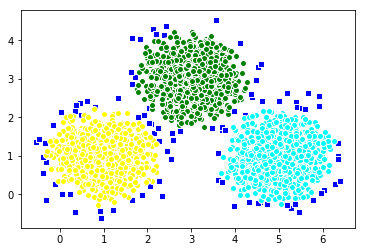

In [1264]:
dbscan = DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

#### eps = 0.4

Silhouette Coefficient: 0.667


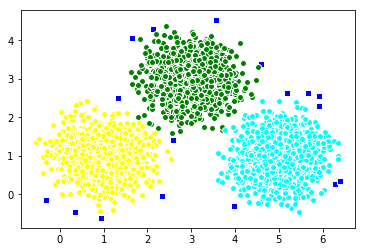

In [1265]:
dbscan = DBSCAN(eps=0.4, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

## Iris

In [1266]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

### KMeans

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.357


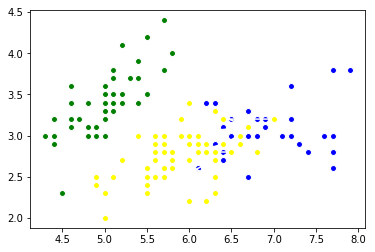

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.590


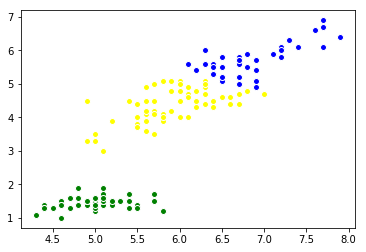

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.474


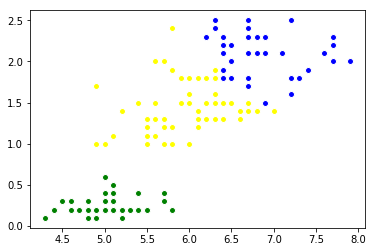

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.589


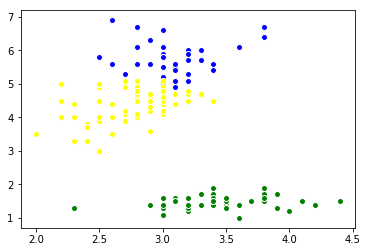

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.448


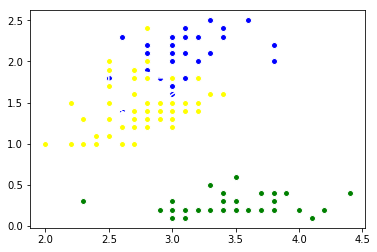

Dunn index: 0.45046895651953744
Davies-Bouldin index: 0.0900030530173
Silhouette Coefficient: 0.635


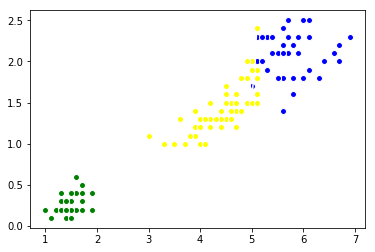

In [1267]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

from itertools import combinations
iris_pairs =list(combinations(range(4), 2))

for first, second in iris_pairs:
    dunn(k_means.cluster_centers_, k_means.labels_)
    db(k_means.cluster_centers_, k_means.labels_)
    plotClustering(X[:, [first, second]], k_means.labels_)

### BIRCH

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.364


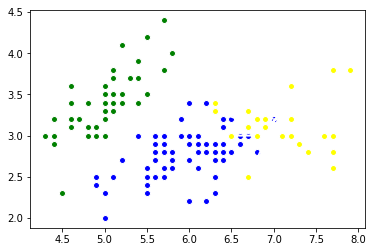

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.576


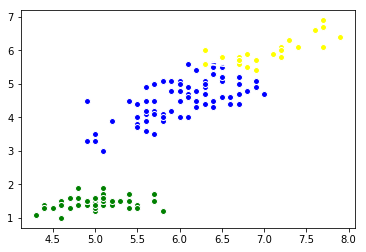

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.461


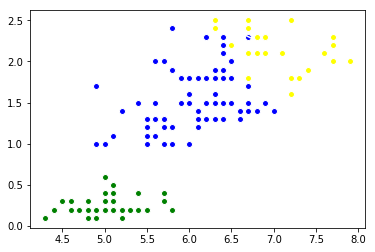

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.571


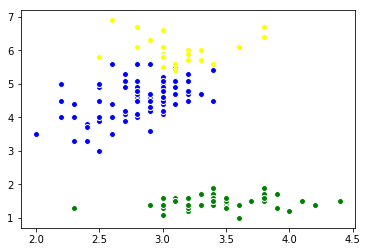

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.405


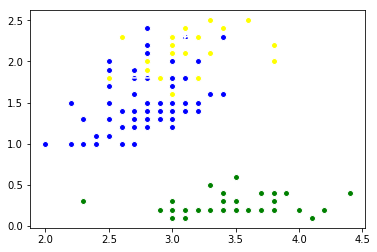

Dunn index: 1.4575235605335388e-15
Davies-Bouldin index: 0.249256683406
Silhouette Coefficient: 0.601


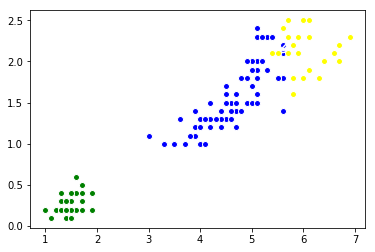

In [1268]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

from itertools import combinations
iris_pairs =list(combinations(range(4), 2))

for first, second in iris_pairs:
    dunn(birch.subcluster_centers_, birch.labels_)
    db(birch.subcluster_centers_, birch.labels_)
    plotClustering(X[:, [first, second]], birch.labels_)

### DBScan

Silhouette Coefficient: 0.392


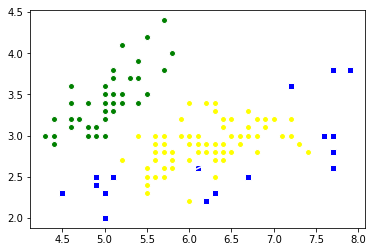

Silhouette Coefficient: 0.517


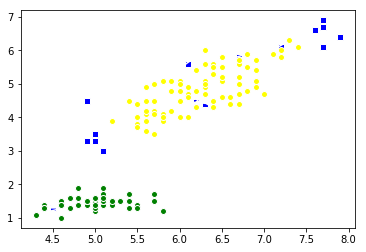

Silhouette Coefficient: 0.424


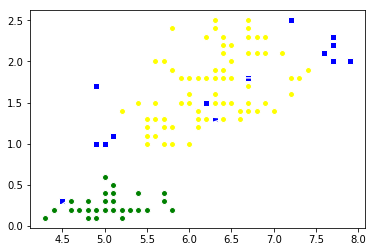

Silhouette Coefficient: 0.516


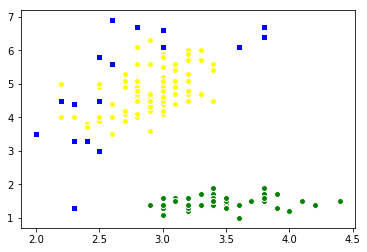

Silhouette Coefficient: 0.385


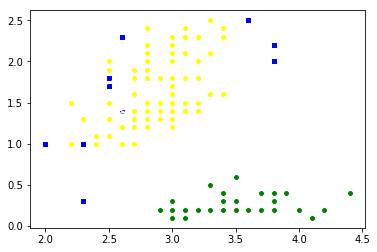

Silhouette Coefficient: 0.513


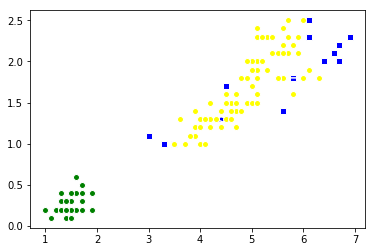

In [1269]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

from itertools import combinations
iris_pairs =list(combinations(range(4), 2))

for first, second in iris_pairs:
    newPlotClustering(X[:, [first, second]], dbscan.labels_)

## Zadanie 1

In [1270]:
def plotClustering(X, plt_labels):
    plt_colors = cycle(('blue', 'green', 'yellow', 'cyan', 'orange', 'purple', 'black'))

    plt_K = np.unique(plt_labels).size

    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)

        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    plt.show()

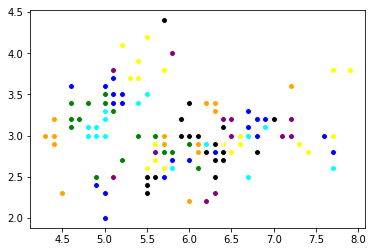

In [1271]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)

plotClustering(X[:, :2], birch.labels_)

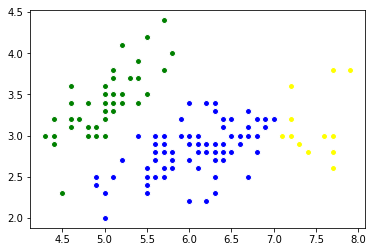

In [1272]:
birch = Birch(threshold=0.25, n_clusters=3)
birch.fit(X)

plotClustering(X[:, :2], birch.labels_)

## Zadanie 2

### Normalizacja

In [1301]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

In [1302]:
maxes = np.max(X, axis=0)
mins = np.min(X, axis=0)
normalized = (X - mins) / (maxes - mins)

#### Kmeans

Dunn index: 5.224636533238183e-16


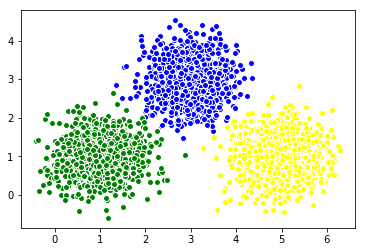

In [1305]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

dunn(k_means.cluster_centers_, k_means.labels_)
plotClustering(X, k_means.labels_)

Dunn index: 0.014349781250893374


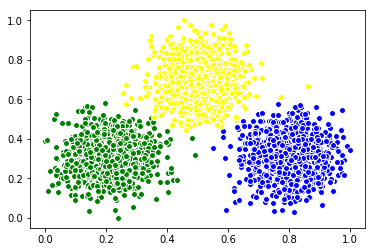

In [1324]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(normalized)

dunn(k_means.cluster_centers_, k_means.labels_)
plotClustering(normalized, k_means.labels_)

#### Birch

Dunn index: 8.912540952612493e-15
Davies-Bouldin index: 0.228262575875


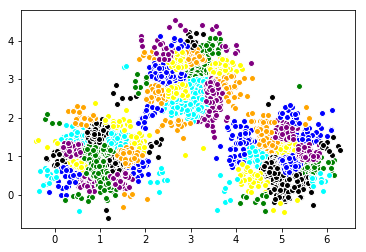

In [1310]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

Dunn index: 0.0175320658104673
Davies-Bouldin index: 0.070760077239


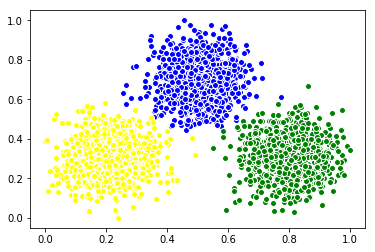

In [1325]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(normalized)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(normalized, birch.labels_)

#### DBScan

Silhouette Coefficient: 0.611


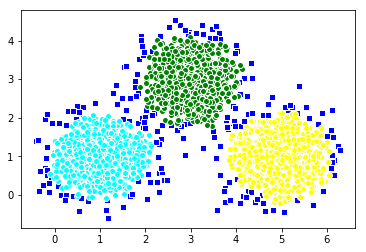

In [1311]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

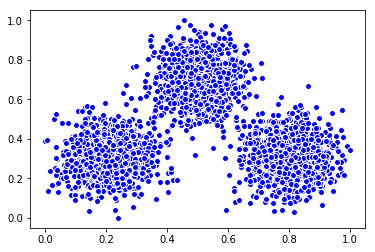

In [1328]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(normalized)

plotClustering(normalized, dbscan.labels_)

### Standaryzacja

In [1329]:
means = np.mean(X, axis=0)

deviation = np.sum((X - means)**2, axis=0)

for col in range(X.shape[1]):
    deviation[col] = math.sqrt(deviation[col])
    
standarized = X - means / deviation

#### Kmeans

Dunn index: 5.224636533238183e-16


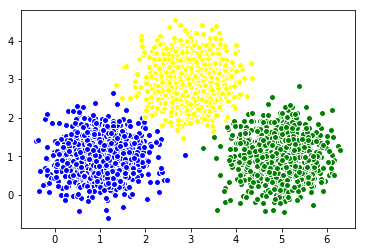

In [1322]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

dunn(k_means.cluster_centers_, k_means.labels_)
plotClustering(X, k_means.labels_)

Dunn index: 0.5864020351129192


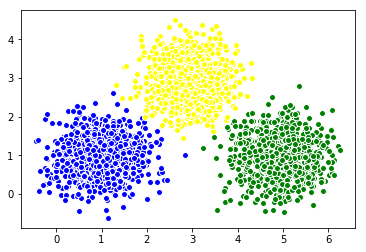

In [1330]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(standarized)

dunn(k_means.cluster_centers_, k_means.labels_)
plotClustering(standarized, k_means.labels_)

#### Birch

Dunn index: 8.912540952612493e-15
Davies-Bouldin index: 0.228262575875


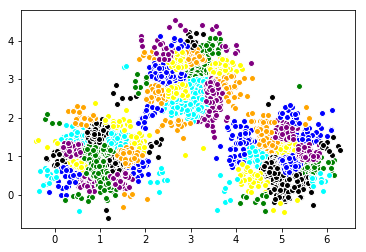

In [1331]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(X, birch.labels_)

Dunn index: 8.912540952612493e-15
Davies-Bouldin index: 0.236402913094


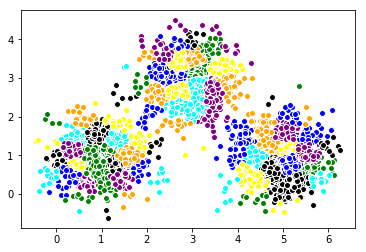

In [1332]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(standarized)

dunn(birch.subcluster_centers_, birch.labels_)
db(birch.subcluster_centers_, birch.labels_)
plotClustering(standarized, birch.labels_)

#### DBScan

Silhouette Coefficient: 0.611


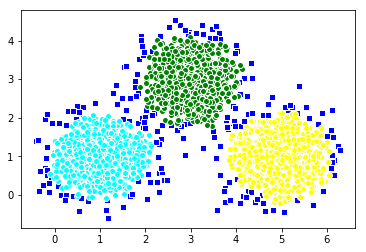

In [1333]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

newPlotClustering(X, dbscan.labels_)

Silhouette Coefficient: 0.611


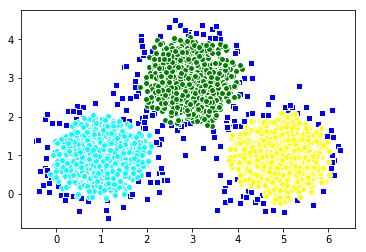

In [1334]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(standarized)

newPlotClustering(standarized, dbscan.labels_)